# Analyse des Verhaltens von Benutzer 32

Das Verhalten des definierten Benutzers wird nachfolgend im Kontext verschiedener Merkmale und Zeiträume betrachtet.

**Vermutlicher Status**
Angehöriger des Hochschulpersonals

### Definition des Benutzers

In [1]:
specified_user = 32

### Import von Bibliotheken und anderen Erweiterungen

In [2]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [3]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [4]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [5]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [6]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [7]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer bestimmten userid
moodle_data = moodle_data[moodle_data.userid == specified_user]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
9272,0,0,32,0,loggedin,\core\event\user_loggedin,user,2163,2020-10-12 13:44:08,,0
9273,0,0,32,32,viewed,\core\event\dashboard_viewed,,0,2020-10-12 13:44:09,,0
9274,25939,0,32,0,viewed,\core\event\course_viewed,,0,2020-10-12 13:44:27,,0
9275,0,0,32,0,loggedout,\core\event\user_loggedout,user,2163,2020-10-12 13:45:26,,0
9276,0,0,32,0,loggedin,\core\event\user_loggedin,user,2163,2020-10-12 13:45:38,,0
...,...,...,...,...,...,...,...,...,...,...,...
967390,28223,4,32,0,viewed,\core\event\course_viewed,,0,2021-06-03 11:47:52,,0
967391,0,0,32,0,loggedout,\core\event\user_loggedout,user,2163,2021-06-03 11:48:05,,0
967435,0,0,32,0,loggedin,\core\event\user_loggedin,user,2163,2021-06-03 12:17:37,,0
967436,0,0,32,32,viewed,\core\event\dashboard_viewed,,0,2021-06-03 12:17:38,,0


### Menge der unterschiedlichen Werte pro Tabellenmerkmal

In [8]:
attributes = moodle_data.nunique()
display(attributes)

courseid                39
Studiengang              3
userid                   1
relateduserid           18
action                  10
eventname               41
objecttable             18
objectid               454
timecreated           1277
course_module_type       9
instanceid              35
dtype: int64

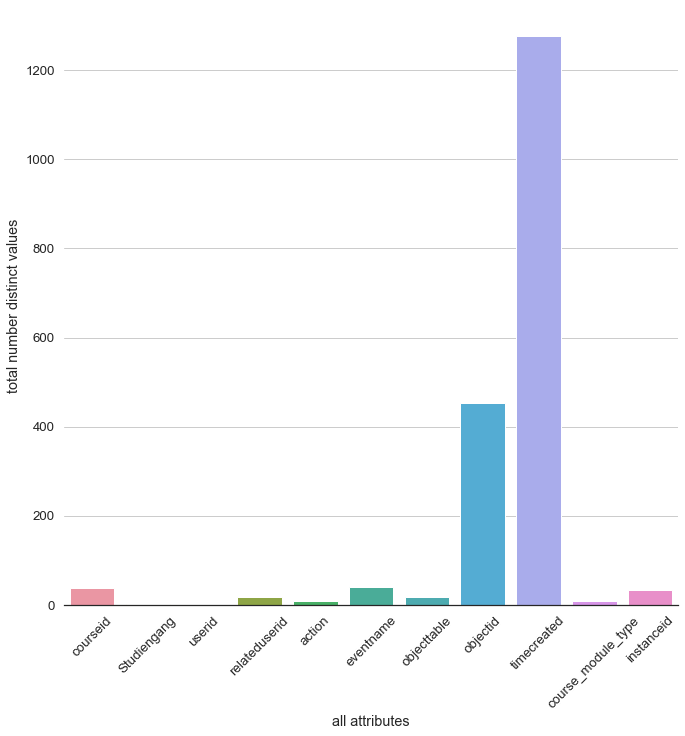

In [9]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
result = attributes
# Visualisierung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Studiengang

In [10]:
studies = moodle_data.Studiengang.groupby(moodle_data.Studiengang).count()
display(studies)

Studiengang
0    5473
2      22
4    1113
Name: Studiengang, dtype: int64

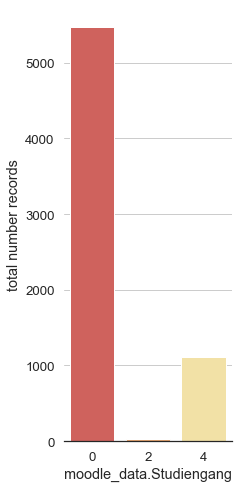

In [11]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(studies.count(), 8)) # Größe der Visualisierung (in inch)

# Ermittlung der Menge der Log-Einträge pro Studiengang
result = studies
# Visualisierung der Menge der Log-Einträge pro Studiengang
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.Studiengang')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Kurs

In [12]:
courses = moodle_data.courseid.groupby(moodle_data.courseid).count()
display(courses.sort_values())

courseid
421         8
425         8
1350        8
1729        8
1750        8
4273        8
26688       8
4223        8
8437       12
2466       12
4257       12
4245       14
4267       16
4239       20
4224       20
4212       22
4222       24
2427       24
4255       28
3983       28
2426       28
27582      32
4237       36
27584      36
4256       44
28217      48
4214       52
9383       52
25939      60
28218      72
27850      96
27439     153
28230     172
4238      172
4236      228
4274      244
28223     564
27001     618
0        3605
Name: courseid, dtype: int64

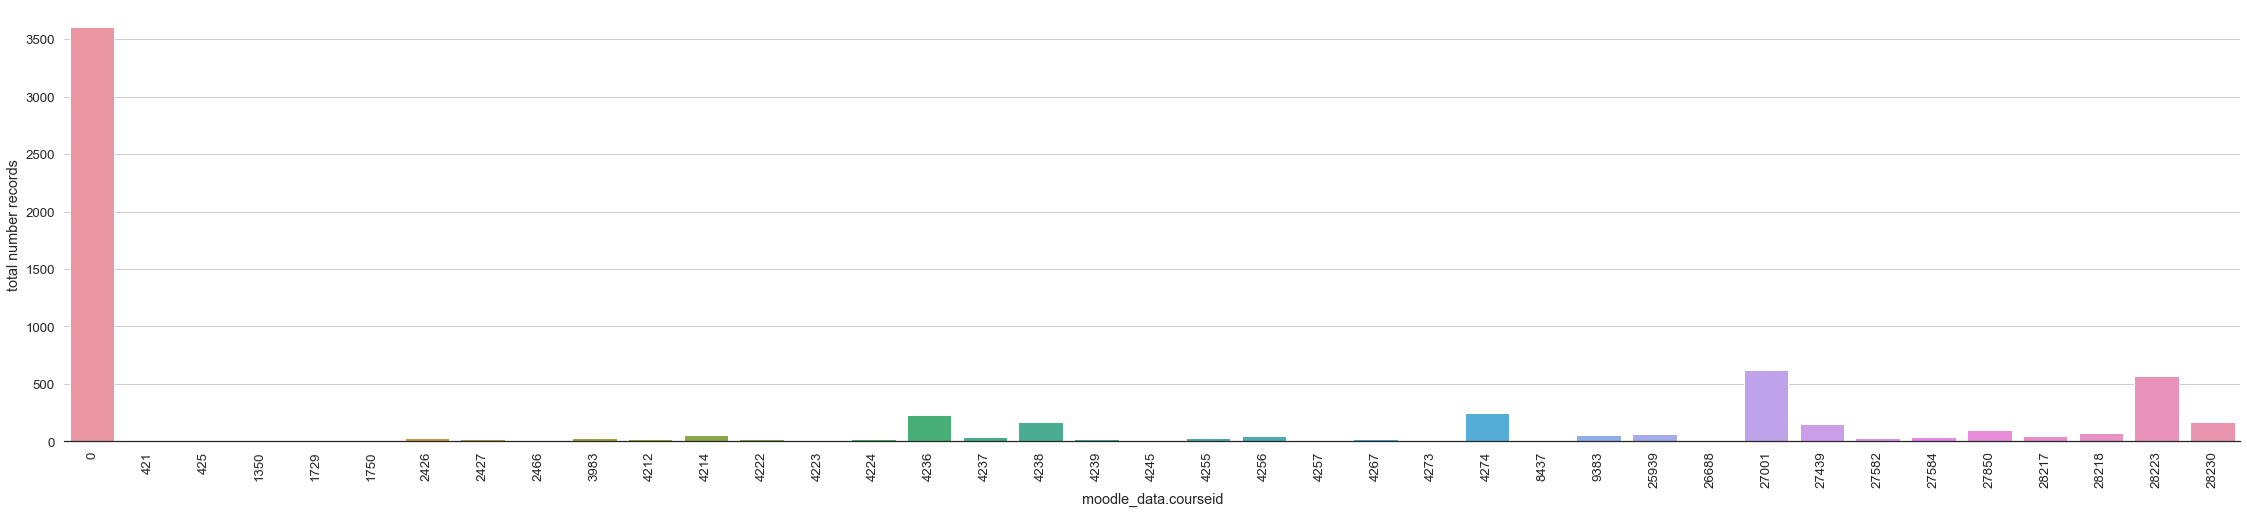

In [13]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(courses.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Kurs
result = courses
# Visualisierung der Menge der Log-Einträge pro Kurs
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Action

In [14]:
actions = moodle_data.action.groupby(moodle_data.action).count()
display(actions)

action
created         92
deleted         36
downloaded       4
failed         108
loggedin       748
loggedout      372
sent          1341
updated        184
uploaded        36
viewed        3687
Name: action, dtype: int64

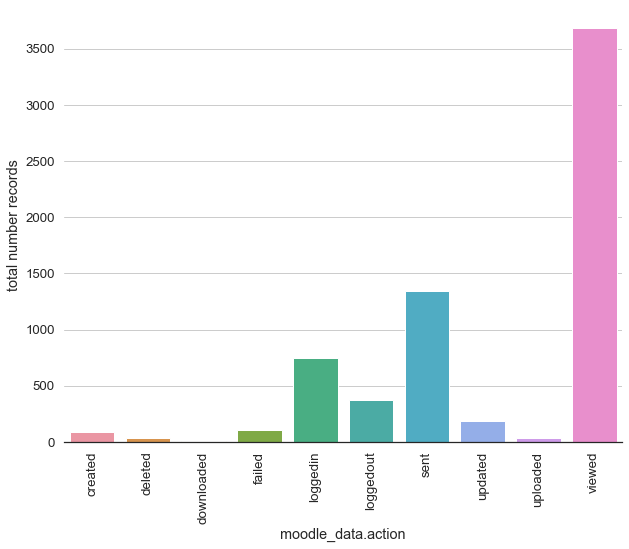

In [15]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(actions.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Action
result = actions
# Visualisierung der Menge der Log-Einträge pro Action
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.action')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Eventname

In [16]:
eventtypes = moodle_data.eventname.groupby(moodle_data.eventname).count()
display(eventtypes)

eventname
\core\event\course_backup_created                       8
\core\event\course_category_viewed                      4
\core\event\course_module_created                      64
\core\event\course_module_deleted                      32
\core\event\course_module_updated                      88
\core\event\course_section_deleted                      4
\core\event\course_section_updated                     32
\core\event\course_viewed                            1424
\core\event\dashboard_viewed                         1020
\core\event\notification_sent                        1341
\core\event\user_list_viewed                           76
\core\event\user_loggedin                             748
\core\event\user_loggedout                            372
\core\event\user_login_failed                         108
\core\event\user_profile_viewed                        82
\gradereport_grader\event\grade_report_viewed          12
\gradereport_outcomes\event\grade_report_viewed         4
\gra

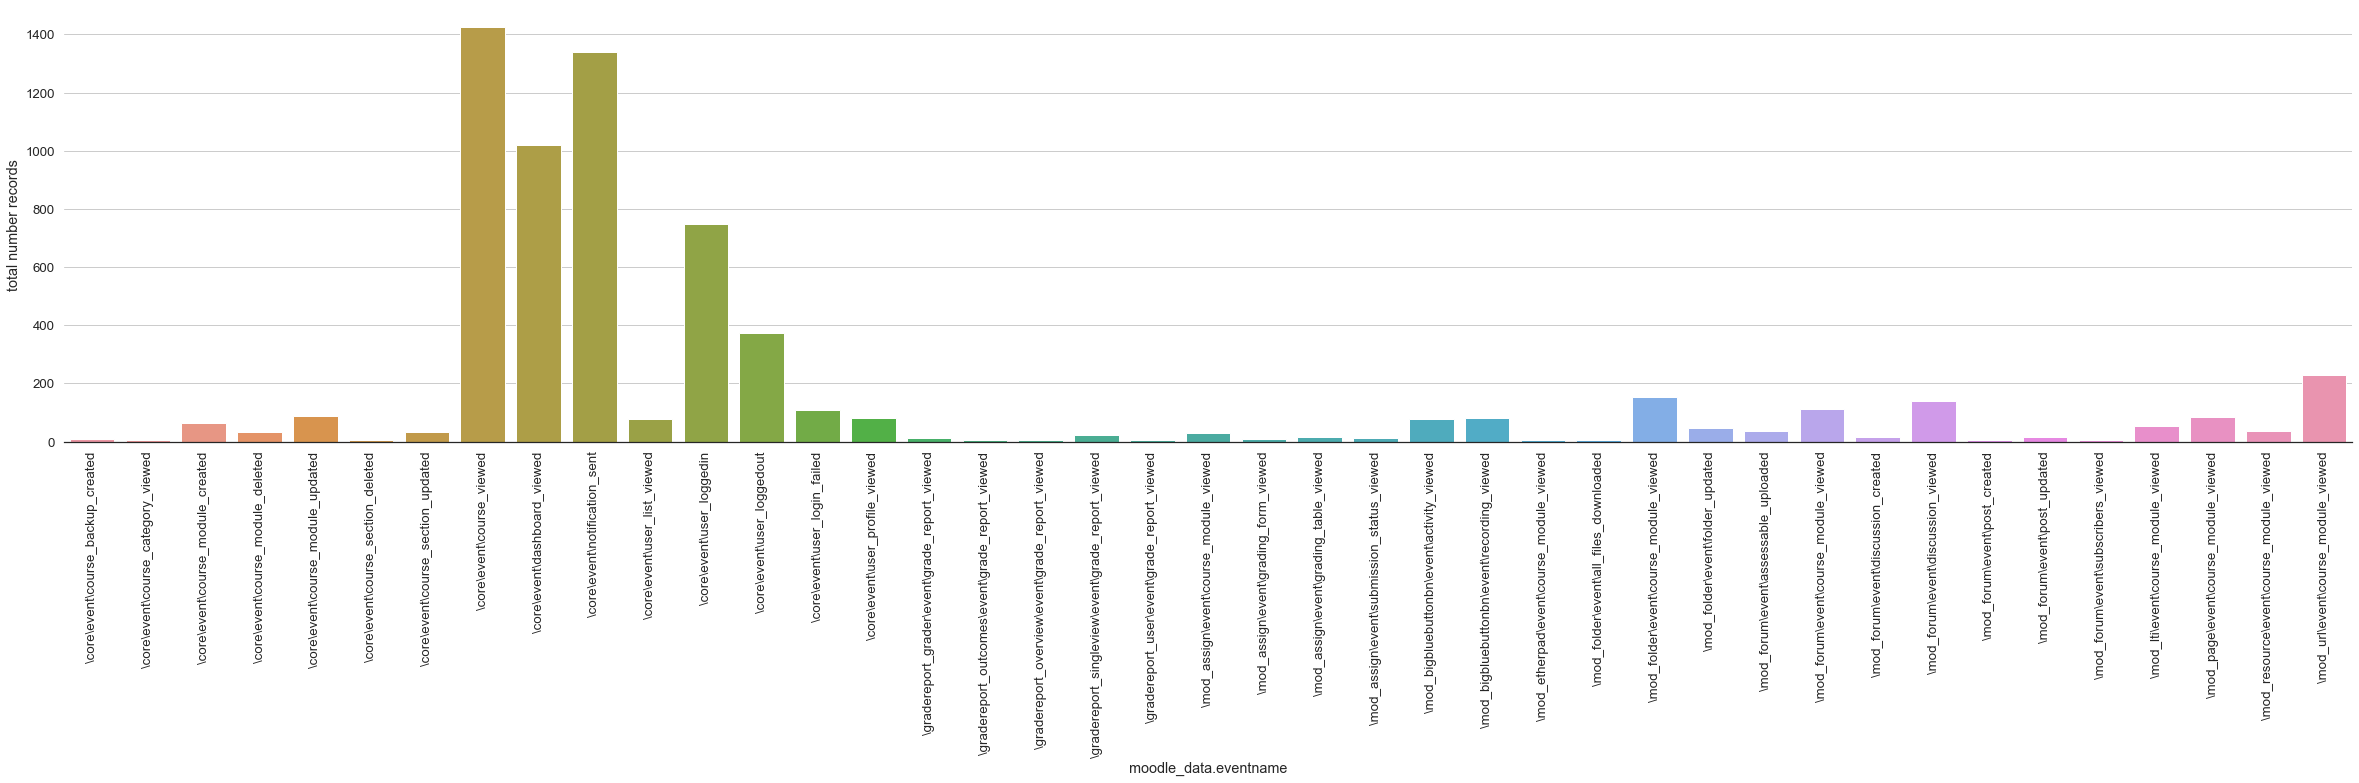

In [17]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(eventtypes.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Eventname
result = eventtypes
# Visualisierung der Menge der Log-Einträge pro Eventname
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.eventname')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Objecttable

In [18]:
objecttables = moodle_data.objecttable.groupby(moodle_data.objecttable).count()
display(objecttables)

objecttable
                     2641
assign                 28
bigbluebuttonbn       156
course                 84
course_categories       4
course_modules        184
course_sections        36
etherpad                4
folder                204
forum                 112
forum_discussions     156
forum_posts            56
lti                    52
notifications        1341
page                   84
resource               36
url                   228
user                 1202
Name: objecttable, dtype: int64

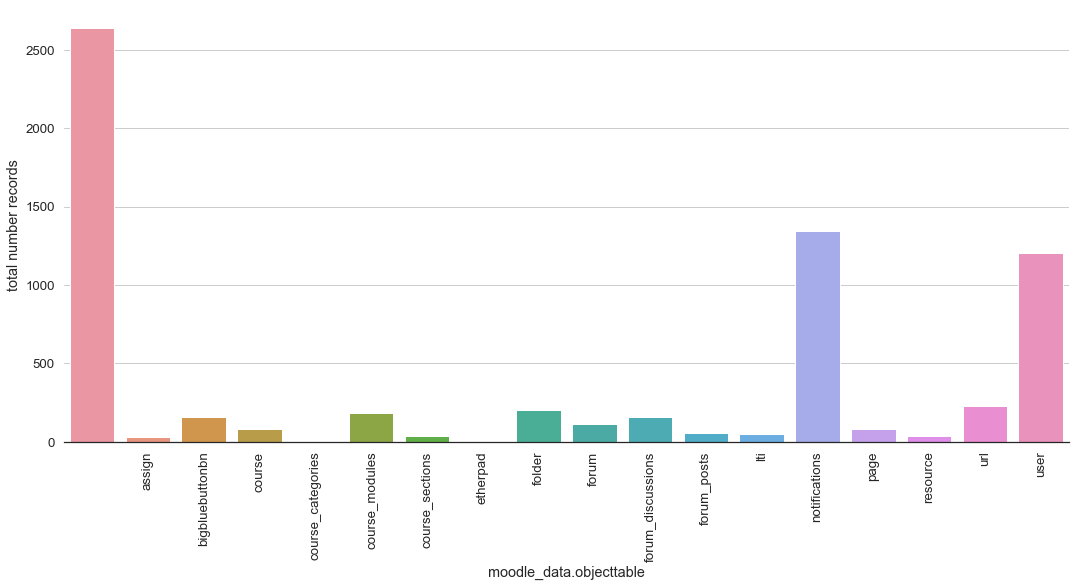

In [19]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(objecttables.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Objecttable
result = objecttables
# Visualisierung der Menge der Log-Einträge pro Objecttable
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.objecttable')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Coursemoduletype

In [20]:
course_module_types = moodle_data.course_module_type.groupby(moodle_data.course_module_type).count()
display(course_module_types)

course_module_type
            6344
folder         8
forum          8
label          8
loop          56
page          20
resource      32
s:54:         80
url           52
Name: course_module_type, dtype: int64

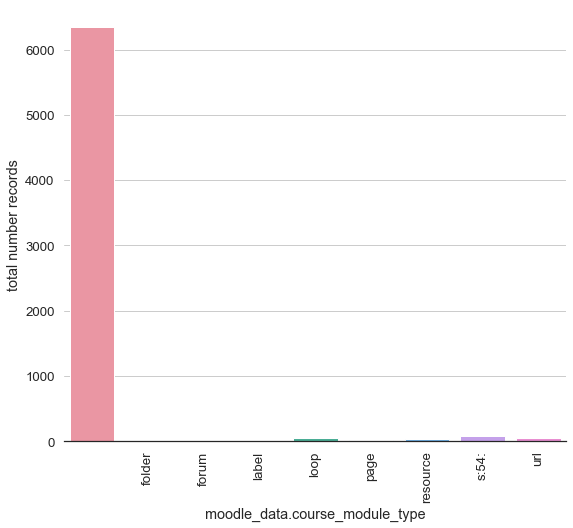

In [21]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(course_module_types.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Coursemoduletype
result = course_module_types
# Visualisierung der Menge der Log-Einträge pro Coursemoduletype
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.course_module_type')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Tagesstunde

In [22]:
# Ausgabe der Tagesstunden der protokollierten Log-Einträge
hours_per_day = moodle_data.timecreated.dt.hour.sort_values()
display(hours_per_day)

781878     5
781879     5
782830     5
781574     5
781573     5
          ..
739071    18
739070    18
739069    18
740509    18
739067    18
Name: timecreated, Length: 6608, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde**

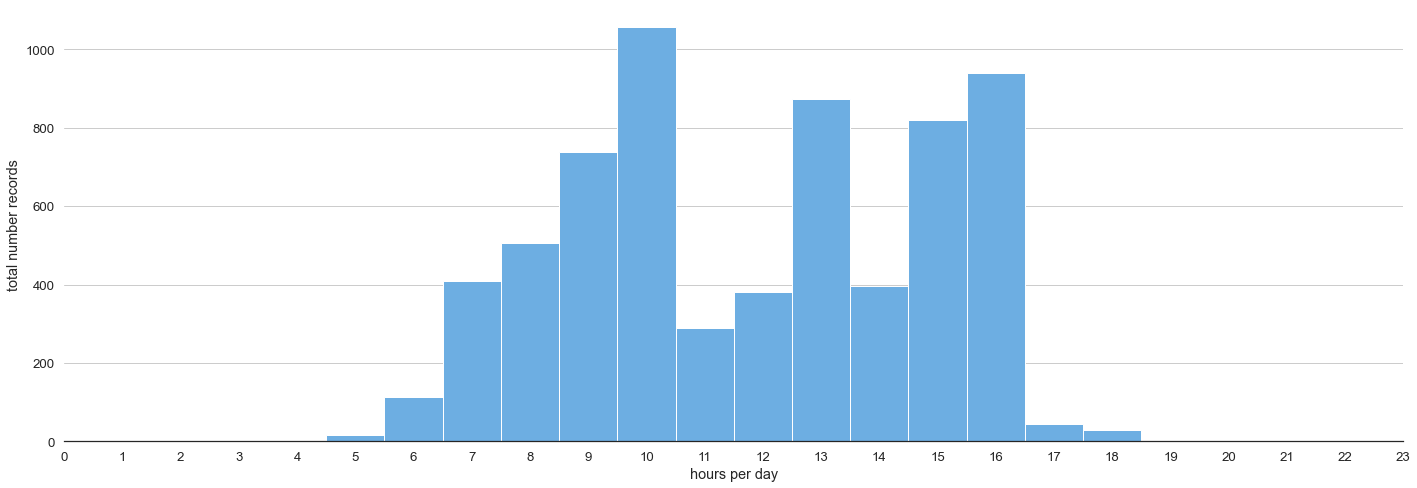

In [23]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde
chart = sns.histplot(hours_per_day, bins=24, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang**

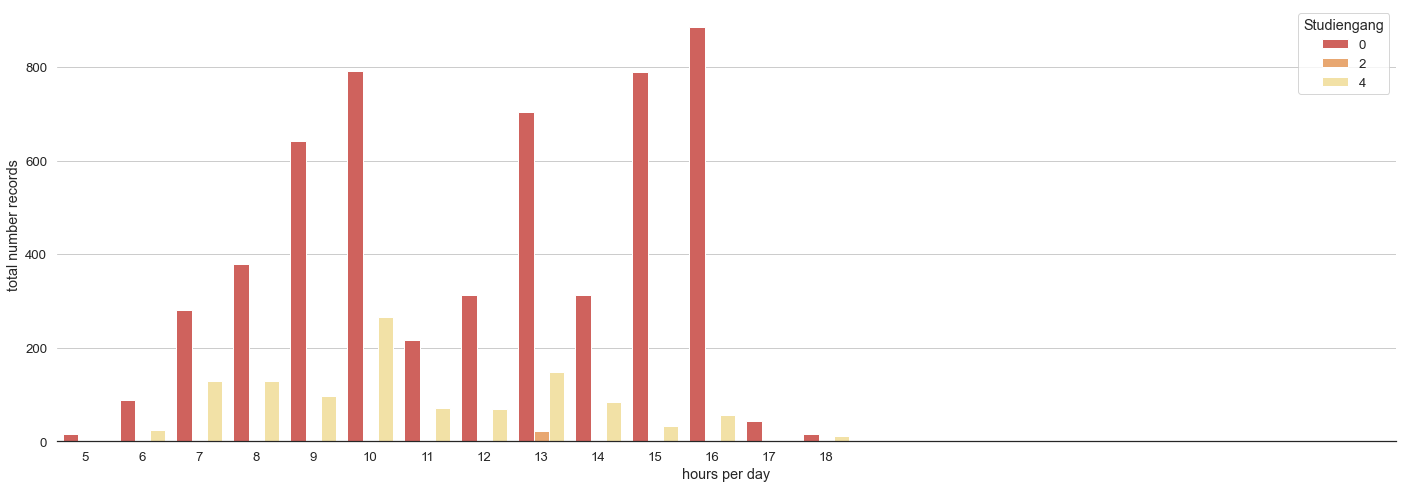

In [24]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang
chart = sns.countplot(x=hours_per_day, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden**

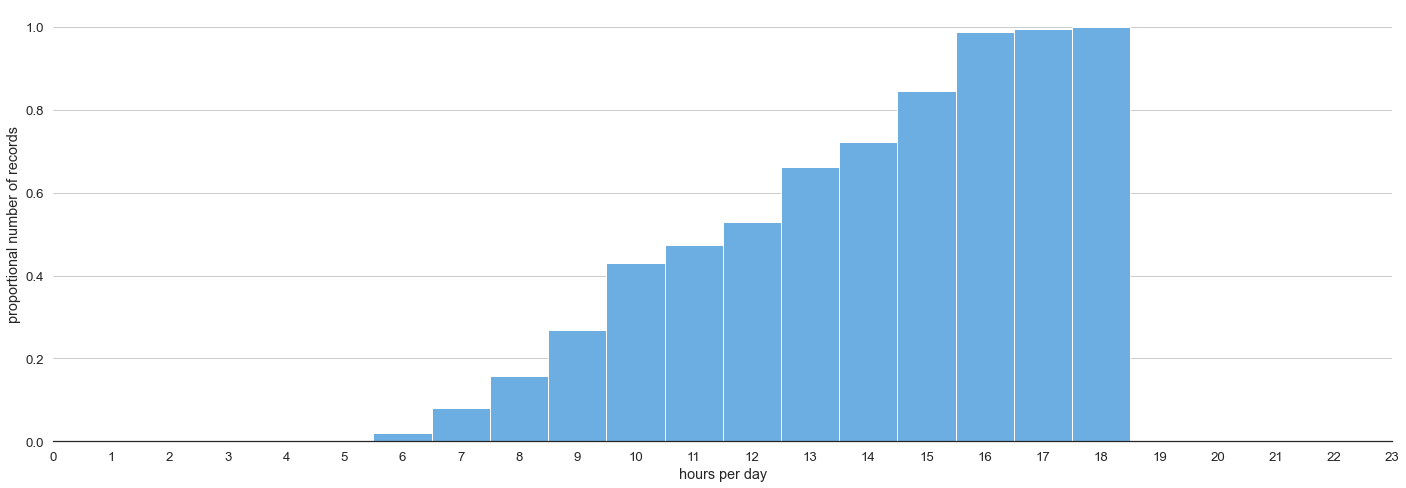

In [25]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden
chart = sns.histplot(hours_per_day, bins=24, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden**

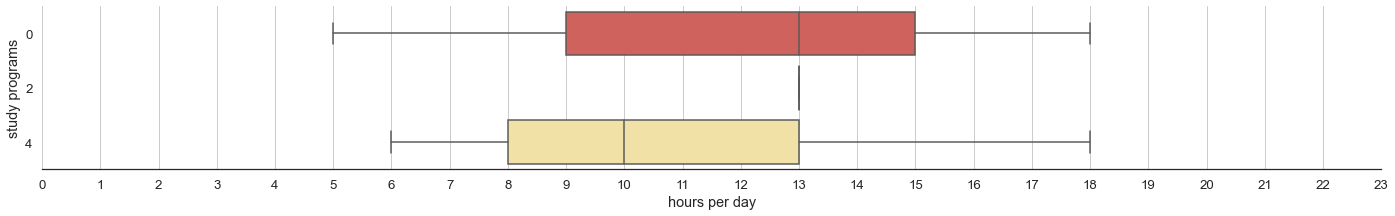

In [26]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, studies.count()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden**

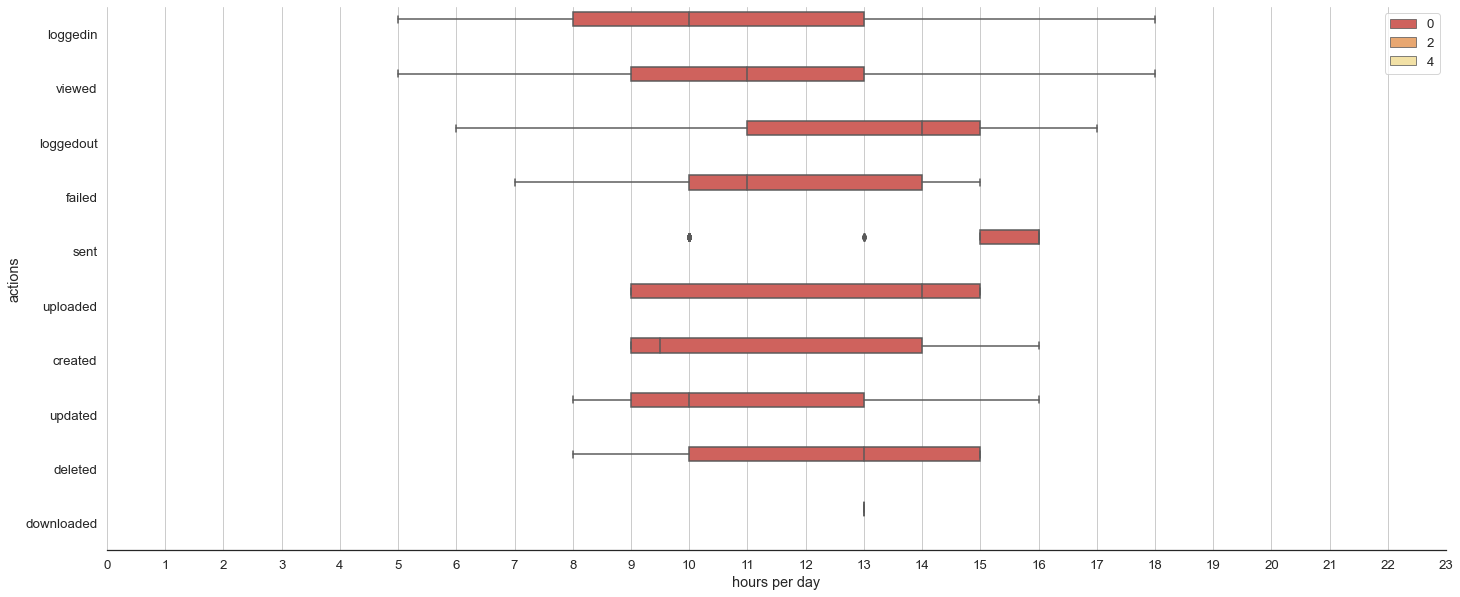

In [27]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Wochentag

In [28]:
# Ausgabe der Wochentage der protokollierten Log-Einträge
days_per_week = moodle_data.timecreated.dt.weekday.sort_values()
display(days_per_week)

9272      0
765659    0
765654    0
765653    0
765652    0
         ..
554327    4
554326    4
554325    4
554303    4
406094    4
Name: timecreated, Length: 6608, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag**

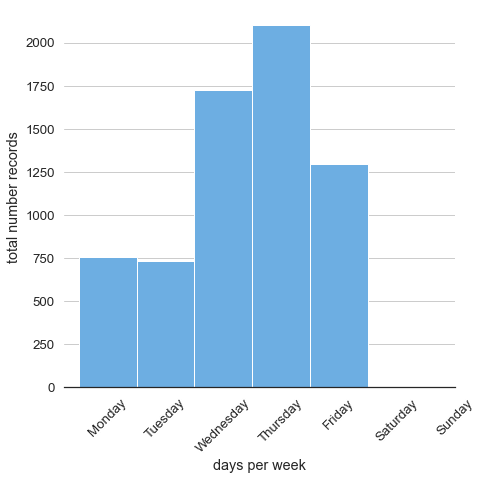

In [29]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag
chart = sns.histplot(days_per_week, bins=7, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang**

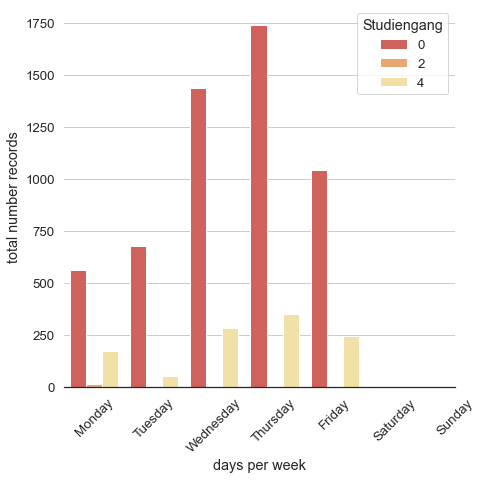

In [30]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang
chart = sns.countplot(x=days_per_week, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage**

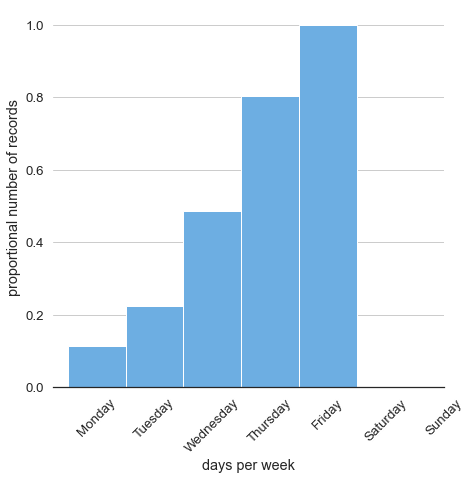

In [31]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage
chart = sns.histplot(days_per_week, bins=7, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage**

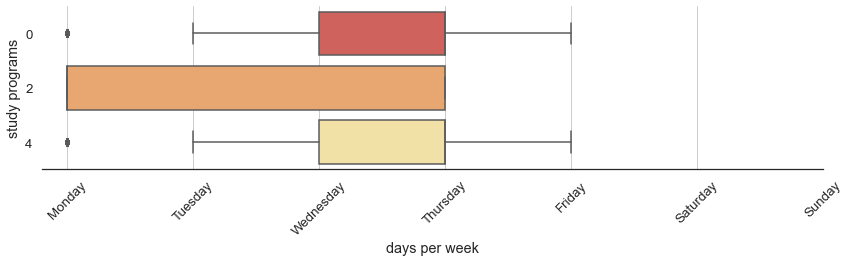

In [32]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, studies.count()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage**

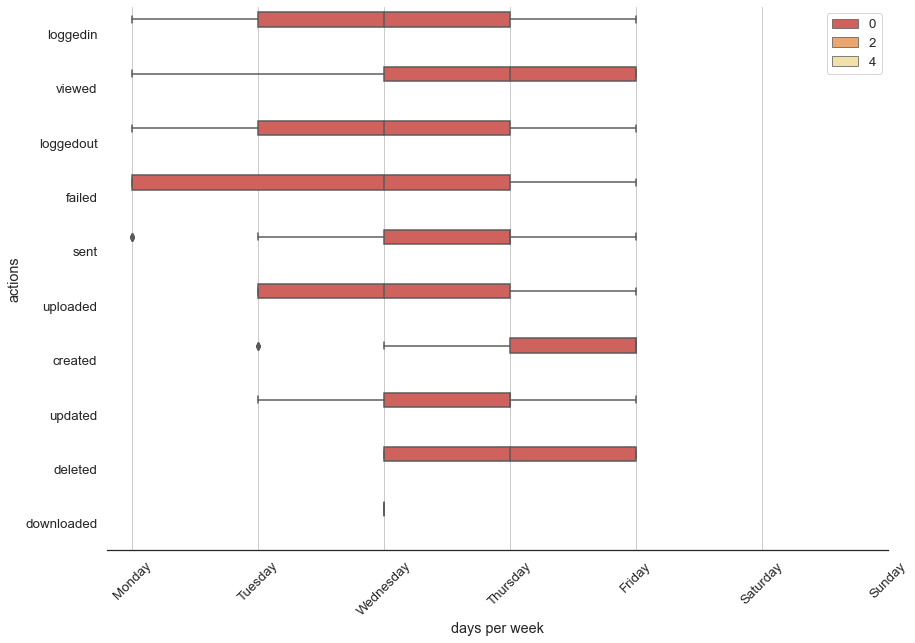

In [33]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()